In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_originals_cleaned.csv")

print(df.shape)
print(df.head())


(579, 8)
             Title                  Genre    Premiere  Runtime  IMDB Score  \
0  Enter the Anime            Documentary  2019-08-05       58         2.5   
1      Dark Forces               Thriller  2020-08-21       81         2.6   
2          The App  Science fiction/Drama  2019-12-26       79         2.6   
3   The Open House        Horror thriller  2018-01-19       94         3.2   
4      Kaali Khuhi                Mystery  2020-10-30       90         3.4   

           Language    Year             Main Genre  
0  English/Japanese  2019.0            Documentary  
1           Spanish  2020.0               Thriller  
2           Italian  2019.0  Science fiction/Drama  
3           English  2018.0        Horror thriller  
4             Hindi  2020.0                Mystery  


In [36]:
print("IMDb Average Score:", df["IMDB Score"].mean())
print("IMDb Median Score:", df["IMDB Score"].median())
print("IMDb Min Score:", df["IMDB Score"].min())
print("IMDb Max Score:", df["IMDB Score"].max())


IMDb Average Score: 6.267875647668395
IMDb Median Score: 6.3
IMDb Min Score: 2.5
IMDb Max Score: 9.0


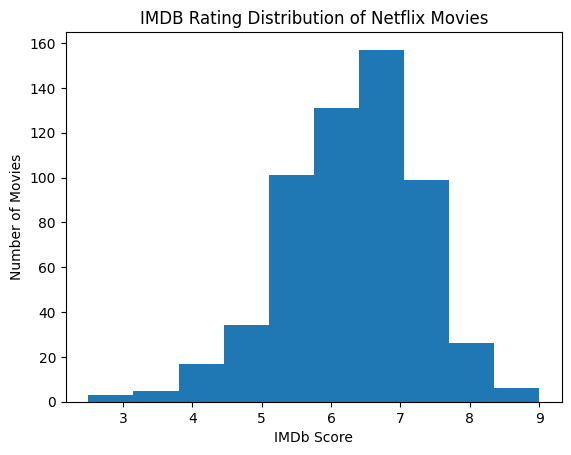

In [37]:
plt.figure()
plt.hist(df["IMDB Score"], bins=10)
plt.title("IMDB Rating Distribution of Netflix Movies")
plt.xlabel("IMDb Score")
plt.ylabel("Number of Movies")
plt.show()


                                           Title  IMDB Score
578     David Attenborough: A Life on Our Planet         9.0
577    Emicida: AmarElo - It's All For Yesterday         8.6
576                      Springsteen on Broadway         8.5
575  Winter on Fire: Ukraine's Fight for Freedom         8.4
574        Taylor Swift: Reputation Stadium Tour         8.4
573   Ben Platt: Live from Radio City Music Hall         8.4
571                       Cuba and the Cameraman         8.3
572                       Dancing with the Birds         8.3
568                                        Klaus         8.2
567            Disclosure: Trans Lives on Screen         8.2


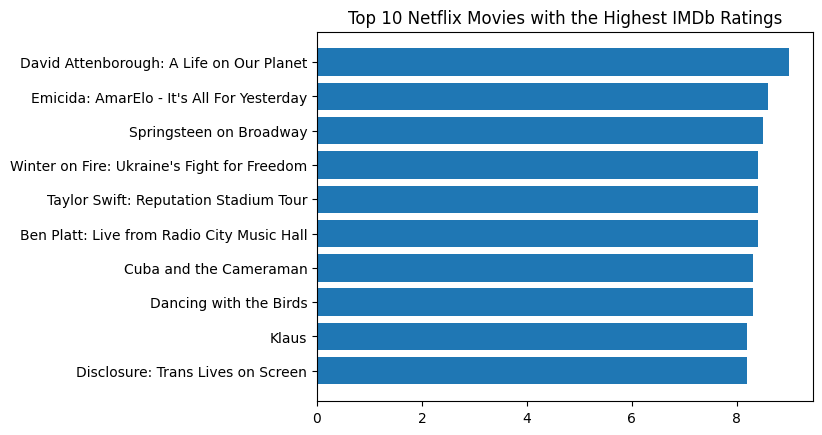

In [38]:
top10 = df.sort_values("IMDB Score", ascending=False).head(10)
print(top10[["Title", "IMDB Score"]])

plt.figure()
plt.barh(top10["Title"], top10["IMDB Score"])
plt.title("Top 10 Netflix Movies with the Highest IMDb Ratings")
plt.gca().invert_yaxis()
plt.show()


                              Title  IMDB Score
0                   Enter the Anime         2.5
1                       Dark Forces         2.6
2                           The App         2.6
3                    The Open House         3.2
4                       Kaali Khuhi         3.4
5                             Drive         3.5
6                 Leyla Everlasting         3.7
7   The Last Days of American Crime         3.7
8                           Paradox         3.9
10             Searching for Sheela         4.1


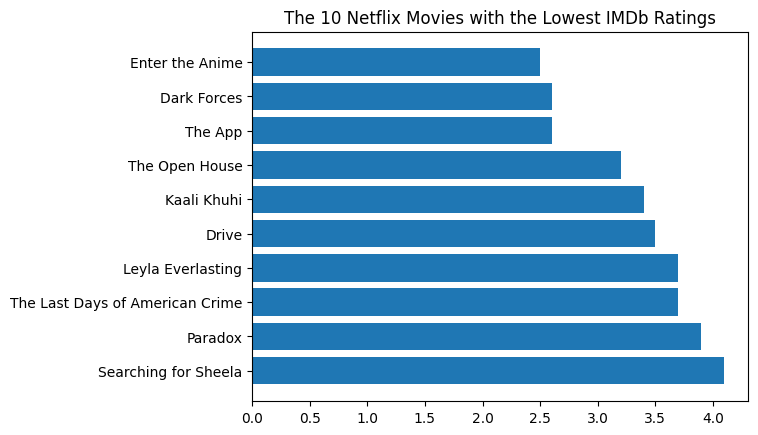

In [39]:
worst10 = df.sort_values("IMDB Score").head(10)
print(worst10[["Title", "IMDB Score"]])

plt.figure()
plt.barh(worst10["Title"], worst10["IMDB Score"])
plt.title("The 10 Netflix Movies with the Lowest IMDb Ratings")
plt.gca().invert_yaxis()
plt.show()


In [40]:
latest_year = df["Year"].max()
last_5_years = df[df["Year"] >= latest_year - 5]



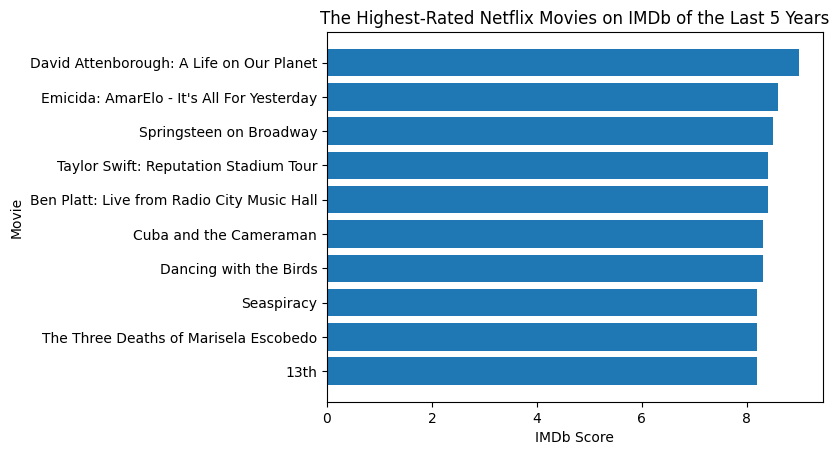

In [41]:
best_last_5 = (
    last_5_years
    .sort_values("IMDB Score", ascending=False)
    .head(10)
)

plt.figure()
plt.barh(best_last_5["Title"], best_last_5["IMDB Score"])
plt.title("The Highest-Rated Netflix Movies on IMDb of the Last 5 Years")
plt.xlabel("IMDb Score")
plt.ylabel("Movie")
plt.gca().invert_yaxis()
plt.show()


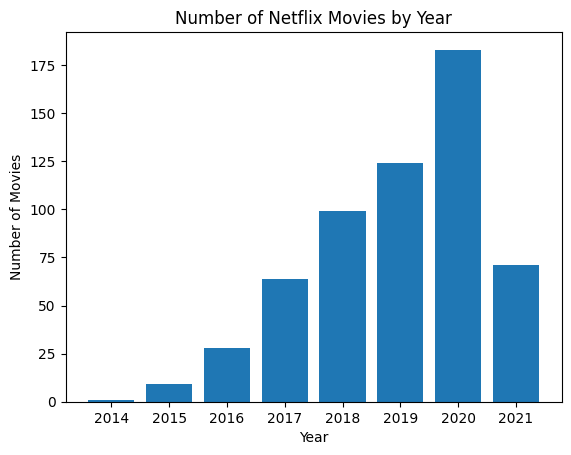

In [42]:
movies_per_year = df.groupby("Year").size()

plt.figure()
plt.bar(movies_per_year.index, movies_per_year.values)
plt.title("Number of Netflix Movies by Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()


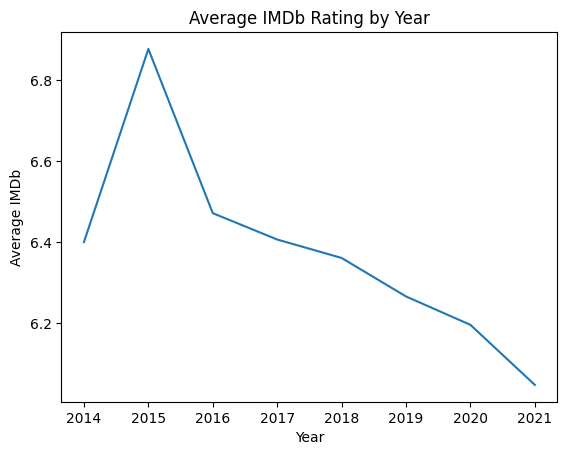

In [43]:
avg_rating_year = df.groupby("Year")["IMDB Score"].mean()

plt.figure()
plt.plot(avg_rating_year.index, avg_rating_year.values)
plt.title("Average IMDb Rating by Year")
plt.xlabel("Year")
plt.ylabel("Average IMDb")
plt.show()


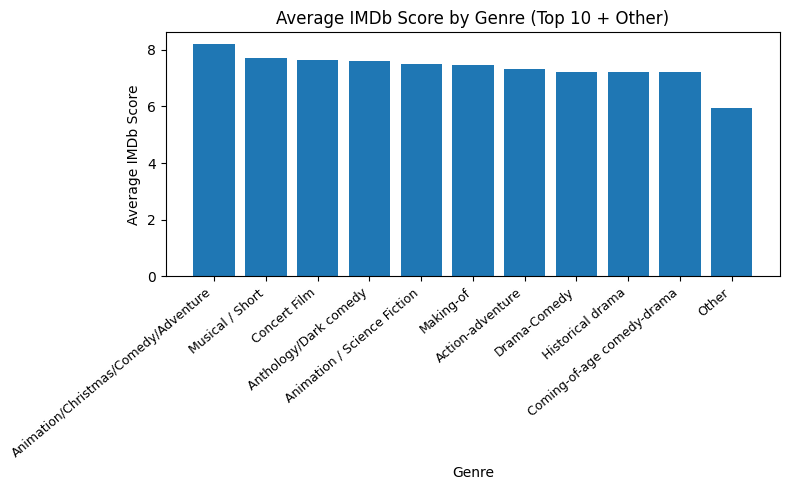

In [44]:
plt.figure(figsize=(8,5))

plt.bar(final_genre_avg.index, final_genre_avg.values)

plt.title("Average IMDb Score by Genre (Top 10 + Other)")
plt.xlabel("Genre")
plt.ylabel("Average IMDb Score")

plt.xticks(rotation=40, ha="right", fontsize=9)

plt.tight_layout()
plt.show()




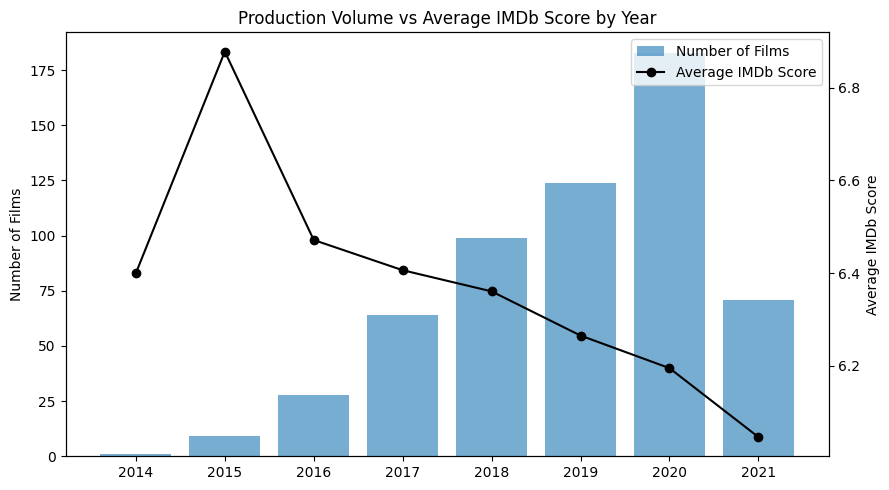

In [45]:
year_count = df.groupby("Year").size()
year_avg = df.groupby("Year")["IMDB Score"].mean()

fig, ax1 = plt.subplots(figsize=(9,5))


bars = ax1.bar(
    year_count.index,
    year_count.values,
    alpha=0.6,
    label="Number of Films"
)
ax1.set_ylabel("Number of Films")


ax2 = ax1.twinx()
line, = ax2.plot(
    year_avg.index,
    year_avg.values,
    color="black",
    marker="o",
    label="Average IMDb Score"
)
ax2.set_ylabel("Average IMDb Score")


ax1.legend(handles=[bars, line], loc="upper right")

plt.title("Production Volume vs Average IMDb Score by Year")
plt.tight_layout()
plt.show()



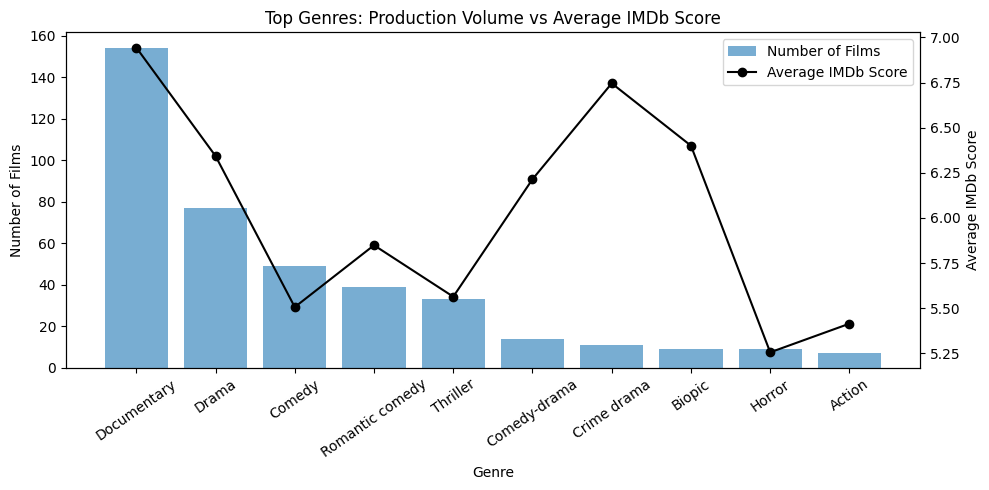

In [46]:
genre_count = df.groupby("Main Genre").size().sort_values(ascending=False).head(10)
genre_avg = df.groupby("Main Genre")["IMDB Score"].mean().loc[genre_count.index]

fig, ax1 = plt.subplots(figsize=(10,5))

bars = ax1.bar(genre_count.index, genre_count.values, alpha=0.6, label="Number of Films")
ax1.set_ylabel("Number of Films")
ax1.set_xlabel("Genre")
ax1.tick_params(axis="x", rotation=35)

ax2 = ax1.twinx()
line, = ax2.plot(genre_avg.index, genre_avg.values, color="black", marker="o", label="Average IMDb Score")
ax2.set_ylabel("Average IMDb Score")

ax1.legend(handles=[bars, line], loc="upper right")
plt.title("Top Genres: Production Volume vs Average IMDb Score")
plt.tight_layout()
plt.show()


Rating Category
0-4 (Bad)           9
4-6 (Mediocre)    210
6-8 (Good)        344
8-10 (Perfect)     16
Name: count, dtype: int64


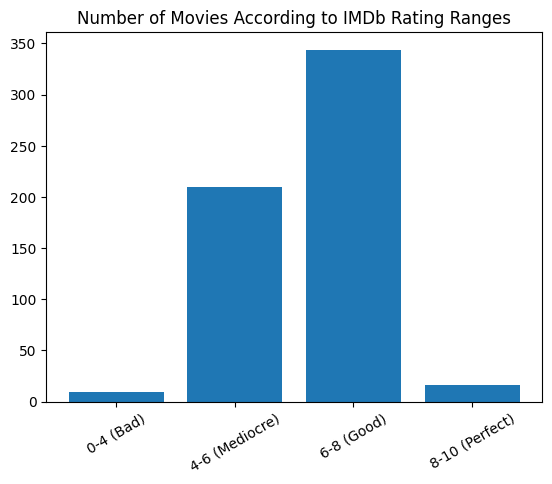

In [47]:
bins = [0, 4, 6, 8, 10]
labels = ["0-4 (Bad)", "4-6 (Mediocre)", "6-8 (Good)", "8-10 (Perfect)"]

df["Rating Category"] = pd.cut(df["IMDB Score"], bins=bins, labels=labels)

rating_dist = df["Rating Category"].value_counts().sort_index()
print(rating_dist)

plt.figure()
plt.bar(rating_dist.index, rating_dist.values)
plt.title("Number of Movies According to IMDb Rating Ranges")
plt.xticks(rotation=30)
plt.show()
